In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json
import pprint
import gzip
import zipfile
import os
import tensorflow as tf
from tensorflow import keras    # tf.keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE

In [ ]:
# !tar -xvf /content/drive/MyDrive/gsod_2018.tar -C /content/drive/MyDrive/gsod_2018

In [ ]:
# !tar -xvf /content/drive/MyDrive/gsod_2017.tar -C /content/drive/MyDrive/gsod_2017

In [ ]:
!unzip /content/drive/MyDrive/gsod_2019.zip

## Preprocess Files

In [ ]:
isd_data_path = './drive/MyDrive/isd-history.csv'

In [ ]:
isd_history = pd.read_csv(isd_data_path)
isd_history_in = isd_history[isd_history['CTRY']=='IN'].reset_index()

In [ ]:
x1 =isd_history_in[isd_history_in['END']>=20200000]
isd_history_in = x1[x1['BEGIN']<20190000]

In [ ]:
isd_history_in.drop(columns=['CTRY', 'index', 'STATE'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
isd_history_in = isd_history_in.reset_index(drop = True)

In [ ]:
isd_history_in

,USAF,WBAN,STATION NAME,ICAO,LAT,LON,ELEV(M),BEGIN,END
0,420260,99999,GULMARG,NaN,34.050,74.400,2655.0,19440601,20201106
1,420270,99999,SRINAGAR,NaN,34.083,74.833,1587.0,19730101,20201106
2,420290,99999,SONAMARG,NaN,34.317,75.317,2515.0,19740613,20201025
3,420440,99999,QAZI GUND,NaN,33.583,75.083,1690.0,20090205,20201106
4,420450,99999,BANIHAL,NaN,33.500,75.167,1630.0,20021023,20201106
...,...,...,...,...,...,...,...,...,...
395,433730,99999,TRIVANDRUM MET.OBS./THUMBA,NaN,8.533,76.867,7.0,20030304,20200103
396,433760,99999,PALAYANKOTTAI,NaN,8.733,77.750,51.0,19730101,20201106
397,433770,99999,KANNIYAKUMARI,NaN,8.083,77.500,37.0,19800710,20201106
398,433790,99999,TUTICORIN NEW PORT,NaN,8.750,78.183,2.0,20090205,20201106


In [ ]:
# isd_history_in = isd_history_in[isd_history_in['BEGIN']<20180101].reset_index().drop(columns=['index'])
year = '2019'
ext = '.op.gz'
np_isd = isd_history_in.to_numpy()
# # isd_history_in['FILE-PREFIX'] = isd_history_in['USAF'].str.cat(isd_history_in['WBAN'], sep='-')
file_names = []
for i in range(0, len(np_isd)):
  name = '{}-{}-{}{}'.format(np_isd[i][0], np_isd[i][1], year, ext)
  file_names.append(name)
print(file_names)
x = os.listdir('./gsod_2019')
y = []
is_available = []
i = 0
col_names = [
             'STN',
             'WBAN',
             'YEARMODA',
             'TEMP',
             'TEMP_COUNT',
             'DEWP',
             'DEWP_COUNT',
             'SLP',
             'SLP_COUNT',
             'STP',
             'STP_COUNT',
             'VISIB',
             'VISIB_COUNT',
             'WDSP',
             'WDSP_COUNT',
             'MXSPD',
             'GUST',
             'MAX',
             'MIN',
             'PRCP',
             'SNDP',
             'FRSHTT']
weather_table = pd.DataFrame(columns=col_names)
for file_name in file_names:
  try:
    with gzip.open('gsod_2019/{}'.format(file_name)) as file:
      x = pd.read_csv('gsod_2019/{}'.format(file_name), sep=" ", skipinitialspace=True, header=0, names=col_names, dtype={'FRSHTT': str})
      weather_table = weather_table.append(x)
      is_available.append(True)
      i+=1
  except:
    y.append(file_name)
    is_available.append(False)
print(i)
# pandas.read

['420260-99999-2019.op.gz', '420270-99999-2019.op.gz', '420290-99999-2019.op.gz', '420440-99999-2019.op.gz', '420450-99999-2019.op.gz', '420560-99999-2019.op.gz', '420620-99999-2019.op.gz', '420630-99999-2019.op.gz', '420650-99999-2019.op.gz', '420710-99999-2019.op.gz', '420750-99999-2019.op.gz', '420770-99999-2019.op.gz', '420780-99999-2019.op.gz', '420790-99999-2019.op.gz', '420801-99999-2019.op.gz', '420810-99999-2019.op.gz', '420830-99999-2019.op.gz', '420990-99999-2019.op.gz', '421010-99999-2019.op.gz', '421030-99999-2019.op.gz', '421040-99999-2019.op.gz', '421050-99999-2019.op.gz', '421110-99999-2019.op.gz', '421140-99999-2019.op.gz', '421170-99999-2019.op.gz', '421230-99999-2019.op.gz', '421310-99999-2019.op.gz', '421370-99999-2019.op.gz', '421390-99999-2019.op.gz', '421430-99999-2019.op.gz', '421470-99999-2019.op.gz', '421480-99999-2019.op.gz', '421510-99999-2019.op.gz', '421650-99999-2019.op.gz', '421700-99999-2019.op.gz', '421740-99999-2019.op.gz', '421760-99999-2019.op.gz', 

In [ ]:
print(weather_table)

        STN   WBAN  YEARMODA  TEMP  ...    MIN   PRCP   SNDP  FRSHTT
0    420270  99999  20190101  35.7  ...   24.4  0.00I  999.9  000000
1    420270  99999  20190102  36.5  ...   32.0  0.00G  999.9  010000
2    420270  99999  20190103  36.9  ...  32.0*  0.00G  999.9  000000
3    420270  99999  20190104  32.7  ...   26.2  0.28E  999.9  001000
4    420270  99999  20190105  35.1  ...   29.7  0.98G  999.9  001000
..      ...    ...       ...   ...  ...    ...    ...    ...     ...
359  433770  99999  20191227  81.0  ...   75.2  0.00G  999.9  000000
360  433770  99999  20191228  80.5  ...   74.8  0.00I  999.9  000000
361  433770  99999  20191229  81.0  ...   75.9  0.00I  999.9  000000
362  433770  99999  20191230  82.1  ...   74.8  0.00I  999.9  000000
363  433770  99999  20191231  81.0  ...   75.9  0.00I  999.9  000000

[64813 rows x 22 columns]


In [ ]:
year = '2018'
ext = '.op.gz'
np_isd = isd_history_in.to_numpy()
# # isd_history_in['FILE-PREFIX'] = isd_history_in['USAF'].str.cat(isd_history_in['WBAN'], sep='-')
file_names = []
for i in range(0, len(np_isd)):
  name = '{}-{}-{}{}'.format(np_isd[i][0], np_isd[i][1], year, ext)
  file_names.append(name)
print(file_names)
x = os.listdir('/content/drive/MyDrive/gsod_2018')
y = []
is_available = []
i = 0
  
for file_name in file_names:
  try:
    with gzip.open('/content/drive/MyDrive/gsod_2018/{}'.format(file_name)) as file:
      x = pd.read_csv('/content/drive/MyDrive/gsod_2018/{}'.format(file_name), sep=" ", skipinitialspace=True, header=0, names=col_names, dtype={'FRSHTT': str})
      weather_table = weather_table.append(x)
      is_available.append(True)
      i+=1
  except:
    y.append(file_name)
    is_available.append(False)
print(i)

['420260-99999-2018.op.gz', '420270-99999-2018.op.gz', '420290-99999-2018.op.gz', '420440-99999-2018.op.gz', '420450-99999-2018.op.gz', '420560-99999-2018.op.gz', '420620-99999-2018.op.gz', '420630-99999-2018.op.gz', '420650-99999-2018.op.gz', '420710-99999-2018.op.gz', '420750-99999-2018.op.gz', '420770-99999-2018.op.gz', '420780-99999-2018.op.gz', '420790-99999-2018.op.gz', '420801-99999-2018.op.gz', '420810-99999-2018.op.gz', '420830-99999-2018.op.gz', '420990-99999-2018.op.gz', '421010-99999-2018.op.gz', '421030-99999-2018.op.gz', '421040-99999-2018.op.gz', '421050-99999-2018.op.gz', '421110-99999-2018.op.gz', '421140-99999-2018.op.gz', '421170-99999-2018.op.gz', '421230-99999-2018.op.gz', '421310-99999-2018.op.gz', '421370-99999-2018.op.gz', '421390-99999-2018.op.gz', '421430-99999-2018.op.gz', '421470-99999-2018.op.gz', '421480-99999-2018.op.gz', '421510-99999-2018.op.gz', '421650-99999-2018.op.gz', '421700-99999-2018.op.gz', '421740-99999-2018.op.gz', '421760-99999-2018.op.gz', 

In [ ]:
year = '2017'
ext = '.op.gz'
np_isd = isd_history_in.to_numpy()
# # isd_history_in['FILE-PREFIX'] = isd_history_in['USAF'].str.cat(isd_history_in['WBAN'], sep='-')
file_names = []
for i in range(0, len(np_isd)):
  name = '{}-{}-{}{}'.format(np_isd[i][0], np_isd[i][1], year, ext)
  file_names.append(name)
print(file_names)
x = os.listdir('/content/drive/MyDrive/gsod_2017')
y = []
is_available = []
i = 0
  
for file_name in file_names:
  try:
    with gzip.open('/content/drive/MyDrive/gsod_2017/{}'.format(file_name)) as file:
      x = pd.read_csv('/content/drive/MyDrive/gsod_2017/{}'.format(file_name), sep=" ", skipinitialspace=True, header=0, names=col_names, dtype={'FRSHTT': str})
      weather_table = weather_table.append(x)
      is_available.append(True)
      i+=1
  except:
    y.append(file_name)
    is_available.append(False)
print(i)

['420260-99999-2017.op.gz', '420270-99999-2017.op.gz', '420290-99999-2017.op.gz', '420440-99999-2017.op.gz', '420450-99999-2017.op.gz', '420560-99999-2017.op.gz', '420620-99999-2017.op.gz', '420630-99999-2017.op.gz', '420650-99999-2017.op.gz', '420710-99999-2017.op.gz', '420750-99999-2017.op.gz', '420770-99999-2017.op.gz', '420780-99999-2017.op.gz', '420790-99999-2017.op.gz', '420801-99999-2017.op.gz', '420810-99999-2017.op.gz', '420830-99999-2017.op.gz', '420990-99999-2017.op.gz', '421010-99999-2017.op.gz', '421030-99999-2017.op.gz', '421040-99999-2017.op.gz', '421050-99999-2017.op.gz', '421110-99999-2017.op.gz', '421140-99999-2017.op.gz', '421170-99999-2017.op.gz', '421230-99999-2017.op.gz', '421310-99999-2017.op.gz', '421370-99999-2017.op.gz', '421390-99999-2017.op.gz', '421430-99999-2017.op.gz', '421470-99999-2017.op.gz', '421480-99999-2017.op.gz', '421510-99999-2017.op.gz', '421650-99999-2017.op.gz', '421700-99999-2017.op.gz', '421740-99999-2017.op.gz', '421760-99999-2017.op.gz', 

In [ ]:
weather_table.to_csv('weather_table.csv',index=False)
print(weather_table)

        STN   WBAN  YEARMODA  TEMP  ...    MIN   PRCP   SNDP  FRSHTT
0    420270  99999  20190101  35.7  ...   24.4  0.00I  999.9  000000
1    420270  99999  20190102  36.5  ...   32.0  0.00G  999.9  010000
2    420270  99999  20190103  36.9  ...  32.0*  0.00G  999.9  000000
3    420270  99999  20190104  32.7  ...   26.2  0.28E  999.9  001000
4    420270  99999  20190105  35.1  ...   29.7  0.98G  999.9  001000
..      ...    ...       ...   ...  ...    ...    ...    ...     ...
360  433770  99999  20171227  81.6  ...   75.4  0.00I  999.9  000000
361  433770  99999  20171228  79.8  ...   73.8  0.00I  999.9  000000
362  433770  99999  20171229  81.1  ...   75.6  0.00I  999.9  000000
363  433770  99999  20171230  80.6  ...   74.5  0.00I  999.9  000000
364  433770  99999  20171231  81.1  ...   74.1  0.00I  999.9  000000

[187383 rows x 22 columns]


In [ ]:
isd_history_in[pd.Series(is_available)].to_csv('filtered_stations.csv',index=False)

In [ ]:
#12004
import json
with open('./drive/MyDrive/NTES_Traindata_final.json') as file:
  ntes_data = json.loads(file.read())

In [ ]:
import pprint
# pprint.pprint(ntes_data['12004'][0]['trainType'])

In [ ]:
holiday = pd.read_csv('./drive/MyDrive/2019.csv')
# print(holiday)
holiday2 = pd.read_csv('./drive/MyDrive/2018.csv')
holiday.append(holiday2)
# 1 day => [d1 d2 d3 ... dn]
# Basic Model
# 1 row d1 # lat lng ... delay lat2 lng2 ... delay2.
# with open('/content/drive/MyDrive/merged_train_data/12004.json','r') as file:
  # train_delay_data = json.loads(file.read())


,date,day,holiday,holiday_type
0,2019-01-01,Tuesday,New Year's Day (R),Restricted
1,2019-01-13,Sunday,Guru Gobind Singh's Birthday (R),Restricted
2,2019-01-14,Monday,Makar Sankranti (R),Restricted
3,2019-01-15,Tuesday,Pongal (R),Restricted
4,2019-01-26,Saturday,Republic Day (G),Gazetted
...,...,...,...,...
42,2018-11-21,Wednesday,Milad-un-Nabi or Id-e-Milad (Birthday of Proph...,Gazetted
43,2018-11-23,Friday,Gur'u Nanak's Birthday (G),Gazetted
44,2018-11-24,Saturday,Guru Teg Bahadur's Martyrdom Day (R),Restricted
45,2018-12-24,Monday,Christmas Eve (R),Restricted


In [ ]:
# train_delay_data.keys()

In [ ]:
def trainrun_to_pd(trainrunjson):
  cols = ['StName','StCode','ExpArr','ActArr','DelayHuman','ExpDep','ActDep','DelayHumanDep','PF']
  delay = pd.DataFrame(data=trainrunjson, columns=cols)
  return delay

In [ ]:
def normalize_delay_human(delay):
  def helper(x):
    if x == 'No Delay':
      return 0
    if x == 'No Record':
      return -1
    delays = x.split(' ')[0:-1]
    # print(delays)
    if len(delays) == 1:
      return int(delays[0][0:-1])
    elif len(delays) == 2:
      # print(delays[0][0:-1])
      return int(delays[0][0:-1])*60 + int(delays[1][0:-1])
    else:
      print("Eroroara", x)
  delay['CalcDelay'] = delay['DelayHuman'].apply(helper)
  # print(delay)
  return delay[['StName','StCode','CalcDelay']]
    
# print()

## Preprocess weather

In [ ]:
def get_dist(lat1,lon1, lat2,lon2):
  R = 6373.0
  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
  return R * c

In [ ]:
filtered_stations = pd.read_csv('./filtered_stations.csv')

In [ ]:
station_data = pd.read_csv('./drive/MyDrive/station_metadata.csv')
print(station_data)

      Unnamed: 0 Station Code  Station Name  ...  Pin Code   Latitude  Longitude
0              0         AABH  AMBIKA BHAWA  ...  841101.0  25.740815  84.964309
1              1         AADR  AMB  ANDAURA  ...  177203.0  31.670487  76.110449
2              2          AAG         ANGAR  ...  413214.0  17.898833  75.577157
3              3          AAH        ITEHAR  ...  477001.0  26.561940  78.671942
4              4          AAL         AMLAI  ...  484220.0  23.172799  81.593702
...          ...          ...           ...  ...       ...        ...        ...
8144        8144           ZP   ZERPUR PALI  ...  123029.0  28.336678  76.133445
8145        8145          ZPI  ZAMPANI HALT  ...  522261.0  16.199566  80.714394
8146        8146          ZPL  ZANGALAPALLE  ...  515721.0  14.590259  77.641602
8147        8147          ZPR   ZORAWARPURA  ...  335024.0  29.757623  73.449695
8148        8148         ZRDE       JIRADEI  ...  841245.0  26.194389  84.258156

[8149 rows x 12 columns]


In [ ]:
import collections
import math
train_weather_map = collections.defaultdict(list)
for ind,row in station_data.iterrows():
  stcode,lat,lng = row['Station Code'],row['Latitude'], row.Longitude
  def get_dist_for_stcode(x):
    USAF, WBAN, LAT, LON = x.USAF, x.WBAN, x.LAT, x.LON
    distance = get_dist(lat,lng,LAT,LON)
    train_weather_map[stcode].append([USAF,WBAN,distance])
    # return 
  filtered_stations.apply(get_dist_for_stcode, axis=1)

In [ ]:
min_train_weather_map = {}
for stcode in train_weather_map:
  min_train_weather_map[stcode] = sorted(train_weather_map[stcode], key=lambda x: x[2])

In [ ]:
with open('sample_data/train_weather_map.json','w+') as file:
  file.write(json.dumps(min_train_weather_map))

In [ ]:
weather_table = pd.read_csv('weather_table.csv',dtype={'FRSHTT':str})
weather_table = weather_table.reset_index(drop=True)
frshtt = pd.DataFrame(weather_table['FRSHTT'].apply(lambda x: list(map(int,list(x))) ).tolist(), columns=['F','R','S','H','T','T2'])
weather_table = weather_table.merge(frshtt,left_index=True,right_index=True)
# weather_table
weather_table = weather_table.drop(columns=['FRSHTT', 'TEMP_COUNT','DEWP_COUNT','SLP_COUNT','STP_COUNT','VISIB_COUNT','WDSP_COUNT'])

In [ ]:
def remove_star(x):
  return float(x.replace('*',''))
def remove_last(x):
  return float(x[0:-1])
weather_table['MIN'] = weather_table['MIN'].apply(remove_star)
weather_table['MAX'] = weather_table['MAX'].apply(remove_star)
weather_table['PRCP'] = weather_table['PRCP'].apply(remove_last)

## Helper Functions

In [ ]:
def get_weather_for_day(delay,date):
  weather_for_run = []
  def helper(stcode):
    row = None
    i = 0
    if stcode == 'MMCT':
      stcode = 'BCT'
    while i < len(min_train_weather_map[stcode]):
      [USAF, WBAN,_] =min_train_weather_map[stcode][i]
      row = weather_table.loc[(weather_table['STN']==USAF) & (weather_table['WBAN']==WBAN) & (weather_table['YEARMODA']==int(date))]
      if len(row)==0:
        # print('eoeroea')
        i+=1
      else:
        weather_for_run.append(np.concatenate(([stcode], row.iloc[0]), axis=0))
        break
  delay['StCode'].apply(helper)
  newCols = ['StCode']
  newCols.extend(weather_table.columns)
  weather_for_run = pd.DataFrame(weather_for_run, columns=(newCols))
  return delay.merge(weather_for_run, on='StCode')

In [ ]:
from  itertools import product
def trainrun_to_xy(delay):
  y = delay['CalcDelay']
  delay = delay.drop(columns=['StCode','StName','STN','WBAN','YEARMODA','CalcDelay'])
  cols = ['{}_{}'.format(b,a) for a, b in product(delay.index.get_level_values(0), delay.columns)]
  X = pd.DataFrame([delay.values.ravel()], columns=cols)
  return X,y

In [ ]:
## Holiday Normalize
def f(x):
  return x.replace('-','')
holiday['date'] = holiday['date'].apply(f)
holiday['holiday_type'] = holiday['holiday_type'].astype('category').cat.codes

In [ ]:
def getHoliday(date):
  row = holiday[holiday['date']==date]
  # print(row)
  if len(row)==0:
    return 2
  return row.iloc[0].holiday_type
# getHoliday("20190127")

import datetime

def getDay(date):
  year = int(date[:4])
  month = int(date[4:6])
  day = int(date[6:])
  that_date = datetime.datetime(year, month, day)
  return that_date.weekday()

# Models

In [118]:
def to_xy(train_no):
  with open('/content/drive/MyDrive/merged_train_data/{}.json'.format(train_no),'r') as file:
    train_delay_data = json.loads(file.read())
  dates = train_delay_data
  # print(train_delay_data)
  print(len(list(train_delay_data.keys())))
  X = pd.DataFrame()
  y = pd.DataFrame()
  i = 1
  for date in train_delay_data:
    if date >= '20200101':
      continue
    # print('Done: {}/{}'.format(i, len(list(train_delay_data.keys()))))
    delay = trainrun_to_pd(train_delay_data[date])
    # print(delay.columns)
    delay = normalize_delay_human(delay)
    # print(delay)
    delay = get_weather_for_day(delay, date)
    X_run, y_run = trainrun_to_xy(delay)
    holiday, weekday = getHoliday(date), getDay(date)
    X_run['holiday'] = pd.Series([holiday])
    X_run['weekday'] = pd.Series([weekday])
    X = X.append(X_run, ignore_index=True)
    y = y.append(y_run, ignore_index=True)
    i=i+1
    # if i>10:
    #   break
  return X,y



In [119]:
def Transform_into_classes(y):
  new_ytrain = []
  for i, row in y.iterrows():
    # print(i)
    nonMinus=-2
    prs=[]
    for j in y:
      if row[j]==-1:
        if nonMinus!=-2:
          # prs.append(nonMinus)
          continue
        else:
          exist=0
          for k in y:
            if k<=j:
              continue
            if row[k]!=-1:
              exist=1
              row[j] = row[k]
              break
          if exist==0:
            row[j] = -1.0
      else:
        nonMinus=row[j]


def Transform_into_classes_2(y):
  for i, row in y.iterrows():
    for j in y:
      if row[j] == -1.0:
        row[j] = 0
      if row[j] < 5.0:
        row[j] = 1
      # elif row[j] < 15.0:
      #   row[j] = 2
      elif row[j] < 30.0:
        row[j] = 2
      # elif row[j] < 60.0:
      #   row[j] = 4
      else:
        row[j] = 3

# X,y = to_xy('12004')
# print(y)
# temp = y
# Transform_into_classes(temp)
# Transform_into_classes_2(temp)
# print(temp)

1160
        0      1      2      3      4      5      6
0    -1.0  132.0  129.0  118.0  117.0  103.0   98.0
1    -1.0  342.0  339.0  328.0  327.0  313.0  308.0
2    -1.0    5.0    0.0   11.0   10.0   16.0   11.0
3    -1.0   30.0   35.0   23.0   22.0    8.0    3.0
4    -1.0   -1.0    9.0    5.0    4.0    3.0    2.0
...   ...    ...    ...    ...    ...    ...    ...
1014 -1.0    7.0   20.0   15.0   27.0   25.0   31.0
1015 -1.0   -1.0   22.0   30.0   41.0   25.0   34.0
1016 -1.0   -1.0   12.0   39.0   46.0   29.0   35.0
1017 -1.0   -1.0   20.0   13.0   29.0   23.0   -1.0
1018 -1.0    2.0   11.0    3.0   20.0   24.0   32.0

[1019 rows x 7 columns]
        0    1    2    3    4    5    6
0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
1     3.0  3.0  3.0  3.0  3.0  3.0  3.0
2     2.0  2.0  1.0  2.0  2.0  2.0  2.0
3     3.0  3.0  3.0  2.0  2.0  2.0  1.0
4     2.0  2.0  2.0  2.0  1.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...
1014  2.0  2.0  2.0  2.0  2.0  2.0  3.0
1015  2.0  2.0  2.0  3.0  

In [120]:
# print(len(temp))
# for i, val enumerate(temp):

# temp[0].to_numpy().astype(int)
# new_X = X.iloc[:, list(range(0,18)) + [126, 127]]
# print(len(temp.iloc[0]))
# Onehot_encoded = tf.keras.utils.to_categorical(temp[1].to_numpy().astype(int), num_classes=6)
# print(Onehot_encoded)

In [121]:

def run_NN_all_trains(train_list, train_xy_dict):
    accuracy_dict = {}
    for train_no in train_list:
        if train_no not in list(train_xy_dict.keys()):
          X,y = to_xy(train_no)
          temp = y.copy()
          Transform_into_classes(temp)
          Transform_into_classes_2(temp)
          train_xy_dict[train_no] = [X,temp,y]
        else:
          temp = train_xy_dict[train_no][1]
          X = train_xy_dict[train_no][0]
          y = train_xy_dict[train_no][2]

        all_accuracies = 0.0
        # no. of models = no. of stations
        for L in range(0, len(temp.iloc[0])):

          # we do not consider y[0], as we know all will be 'no records'. we take previous station features into account.
            new_X = X.iloc[:, list(range(0,18*(L+1))) + [126, 127]]
            Onehot_encoded = tf.keras.utils.to_categorical(temp[L].to_numpy().astype(int), num_classes=len(temp.iloc[0]))
            x_train,x_test,y_train,y_test = train_test_split(new_X.to_numpy().astype(float), Onehot_encoded,test_size=0.2, random_state = 42)
            x_train = np.asarray(x_train)
            x_test = np.asarray(x_test)
            y_train = np.asarray(y_train)
            y_test = np.asarray(y_test)

            model = keras.Sequential([
                keras.layers.Dense(512, activation='relu'),
                keras.layers.Dense(256, activation='relu'),
                keras.layers.Dense(128, activation='relu'),
                keras.layers.Dense(64, activation='relu'),
                keras.layers.Dense(32, activation='relu'),
                keras.layers.Dense(len(temp.iloc[0]))
            ])
            # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
            model.compile(optimizer='adam',
                          loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                          metrics=["accuracy"])
            model.fit(x_train, y_train, batch_size=16, epochs=50, verbose=0)
            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
            all_accuracies += test_acc
        accuracy_dict[train_no] = all_accuracies/(len(temp.iloc[0]))
    return accuracy_dict

In [136]:

def run_NN_with_SMOTE_all_trains(train_list, train_xy_dict):
    accuracy_dict = {}
    for train_no in train_list:
        if train_no not in list(train_xy_dict.keys()):
          X,y = to_xy(train_no)
          temp = y.copy()
          Transform_into_classes(temp)
          Transform_into_classes_2(temp)
          train_xy_dict[train_no] = [X,temp,y]
        else:
          temp = train_xy_dict[train_no][1]
          X = train_xy_dict[train_no][0]
          y = train_xy_dict[train_no][2]

        all_accuracies = 0.0
        # no. of models = no. of stations
        for L in range(0, len(temp.iloc[0])):

          # we do not consider y[0], as we know all will be 'no records'. we take previous station features into account.
            new_X = X.iloc[:, list(range(0,18*(L+1))) + [126, 127]]
            oversample = SMOTE()
            try:
              X_os, y_os = oversample.fit_resample(new_X, temp[L].to_numpy().astype(int))
            except ValueError:
              X_os, y_os = new_X.to_numpy(), temp[L].to_numpy().astype(int)
            Onehot_encoded = tf.keras.utils.to_categorical(y_os, num_classes=len(temp.iloc[0]))
            x_train,x_test,y_train,y_test = train_test_split(X_os.astype(float), Onehot_encoded,test_size=0.2, random_state = 42)
            x_train = np.asarray(x_train)
            x_test = np.asarray(x_test)
            y_train = np.asarray(y_train)
            y_test = np.asarray(y_test)

            model = keras.Sequential([
                keras.layers.Dense(512, activation='relu'),
                keras.layers.Dense(256, activation='relu'),
                keras.layers.Dense(128, activation='relu'),
                keras.layers.Dense(64, activation='relu'),
                keras.layers.Dense(32, activation='relu'),
                keras.layers.Dense(len(temp.iloc[0]))
            ])
            # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
            model.compile(optimizer='adam',
                          loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                          metrics=["accuracy"])
            model.fit(x_train, y_train, batch_size=16, epochs=50, verbose=0)
            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
            all_accuracies += test_acc
        accuracy_dict[train_no] = all_accuracies/(len(temp.iloc[0]))
    return accuracy_dict

In [123]:

def run_XGB_all_trains(train_list, train_xy_dict):
    accuracy_dict = {}
    for train_no in train_list:
        if train_no not in list(train_xy_dict.keys()):
          X,y = to_xy(train_no)
          temp = y.copy()
          Transform_into_classes(temp)
          Transform_into_classes_2(temp)
          train_xy_dict[train_no] = [X,temp,y]
        else:
          temp = train_xy_dict[train_no][1]
          X = train_xy_dict[train_no][0]
          y = train_xy_dict[train_no][2]

        all_accuracies = 0.0
        # no. of models = no. of stations
        for L in range(0, len(temp.iloc[0])):

          # we do not consider y[0], as we know all will be 'no records'. we take previous station features into account.
            new_X = X.iloc[:, list(range(0,18*(L+1))) + [126, 127]]
            # Onehot_encoded = tf.keras.utils.to_categorical(temp[L].to_numpy().astype(int), num_classes=len(temp.iloc[0])-1)
            x_train,x_test,y_train,y_test = train_test_split(new_X.to_numpy().astype(float), temp[L].to_numpy().astype(int),test_size=0.2, random_state = 42)
            x_train = np.asarray(x_train)
            x_test = np.asarray(x_test)
            y_train = np.asarray(y_train)
            y_test = np.asarray(y_test)
            # print(x_train.shape)
            # print(y_train.shape)
            xg_reg = xgb.XGBClassifier()
            xg_reg.fit(x_train, y_train)

            preds = xg_reg.predict(x_test)
            # print(accuracy_score(y_test,preds))

            all_accuracies += accuracy_score(y_test,preds)
        accuracy_dict[train_no] = all_accuracies/(len(temp.iloc[0]))
    return accuracy_dict

In [133]:

def run_XGB_with_SMOTE_all_trains(train_list, train_xy_dict):
    accuracy_dict = {}
    for train_no in train_list:
        if train_no not in list(train_xy_dict.keys()):
          X,y = to_xy(train_no)
          temp = y.copy()
          Transform_into_classes(temp)
          Transform_into_classes_2(temp)
          train_xy_dict[train_no] = [X,temp,y]
        else:
          temp = train_xy_dict[train_no][1]
          X = train_xy_dict[train_no][0]
          y = train_xy_dict[train_no][2]

        all_accuracies = 0.0
        # no. of models = no. of stations
        for L in range(0, len(temp.iloc[0])):

          # we do not consider y[0], as we know all will be 'no records'. we take previous station features into account.
            new_X = X.iloc[:, list(range(0,18*(L+1))) + [126, 127]]
            oversample = SMOTE()
            try:
              X_os, y_os = oversample.fit_resample(new_X, temp[L].to_numpy().astype(int))
            except ValueError:
              X_os, y_os = new_X.to_numpy(), temp[L].to_numpy().astype(int)
            # Onehot_encoded = tf.keras.utils.to_categorical(temp[L].to_numpy().astype(int), num_classes=len(temp.iloc[0])-1)
            x_train,x_test,y_train,y_test = train_test_split(X_os.astype(float), y_os,test_size=0.2, random_state = 42)
            x_train = np.asarray(x_train)
            x_test = np.asarray(x_test)
            y_train = np.asarray(y_train)
            y_test = np.asarray(y_test)
            # print(x_train.shape)
            # print(y_train.shape)
            xg_reg = xgb.XGBClassifier()
            xg_reg.fit(x_train, y_train)

            preds = xg_reg.predict(x_test)
            print(accuracy_score(y_test,preds))

            all_accuracies += accuracy_score(y_test,preds)
        accuracy_dict[train_no] = all_accuracies/(len(temp.iloc[0]))
    return accuracy_dict

In [138]:

def run_Markov_all_trains(train_list, train_xy_dict):
    accuracy_dict = {}
    for train_no in train_list:
        if train_no not in list(train_xy_dict.keys()):
          X,y = to_xy(train_no)
          temp = y.copy()
          Transform_into_classes(temp)
          Transform_into_classes_2(temp)
          train_xy_dict[train_no] = [X,temp,y]
        else:
          temp = train_xy_dict[train_no][1]
          X = train_xy_dict[train_no][0]
          y = train_xy_dict[train_no][2]

        all_accuracies = 0.0
        # no. of models = no. of stations
        for L in range(0, len(temp.iloc[0])):

          # we do not consider y[0], as we know all will be 'no records'. we take previous station features into account.
            new_X = X.iloc[:, list(range(0,18*(L+1))) + [126, 127]]
            # Onehot_encoded = tf.keras.utils.to_categorical(temp[L].to_numpy().astype(int), num_classes=len(temp.iloc[0])-1)
            # here note: we use y, not temp
            x_train,x_test,y_train,y_test = train_test_split(new_X.to_numpy().astype(float), y[L].to_numpy().astype(float),test_size=0.2, random_state = 42)
            x_train = np.asarray(x_train)
            x_test = np.asarray(x_test)
            y_train = np.asarray(y_train)
            y_test = np.asarray(y_test)
            # print(x_train.shape)
            # print(y_train.shape)
            regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
            regressor.fit(x_train,y_train)   
            pred_markov = regressor.predict(x_test)
            # print(pred_markov)
            # print(y_test)

            # all_accuracies += accuracy_score(y_test,preds)
            all_accuracies += mean_absolute_error(y_test, pred_markov)
        print(all_accuracies)
        accuracy_dict[train_no] = all_accuracies/(len(temp.iloc[0]))
    return accuracy_dict

In [126]:
train_xy_dict = {}

#Loop over Trains

In [ ]:
# train_list = ['12009', '12004']
train_list = ['12009', '11001', '11015', '12512', 
              '17016', '24228', '31770,' '31801', '34420', '34221', 
              '38051', '38052', '40509', '40510', '43437', '43438']

for train_no in train_list:
  if train_no not in list(train_xy_dict.keys()):
    X,y = to_xy(train_no)
    temp = y.copy()
    Transform_into_classes(temp)
    Transform_into_classes_2(temp)
    train_xy_dict[train_no] = [X,temp,y]
# print(train_xy_dict)

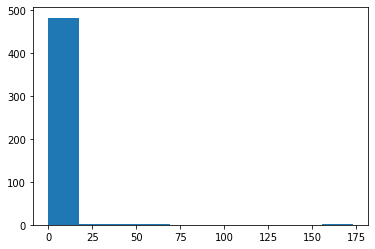

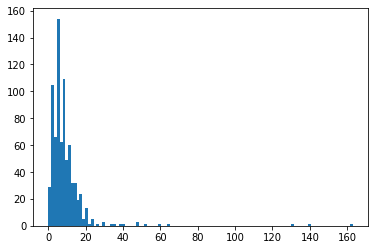

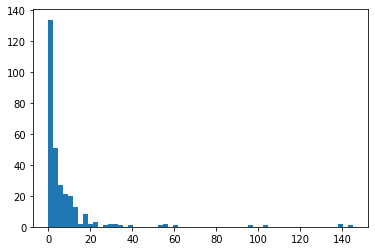

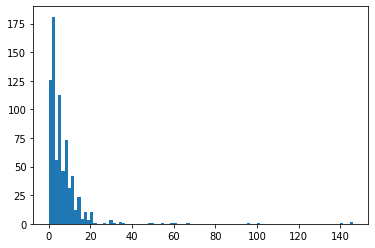

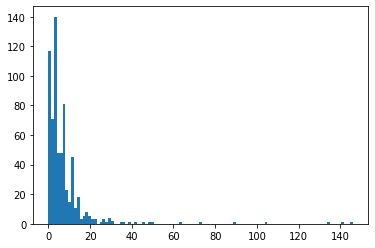

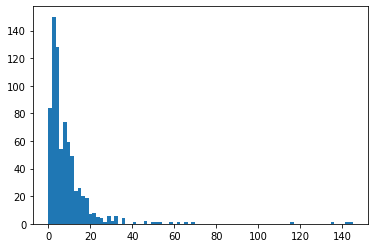

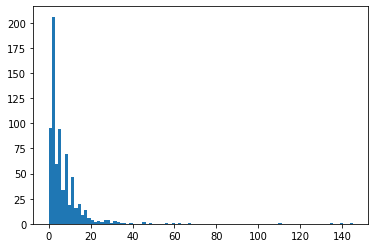

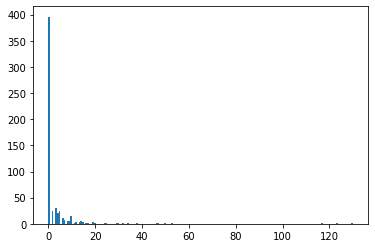

In [143]:
import matplotlib.pyplot as plt

y_dash = train_xy_dict['12009'][2]
import seaborn as sns
for i in range(8):
  data = []
  for delay in y_dash[i].to_numpy():
    if delay != -1:
      data.append(delay)
  plt.figure()
  plt.hist(data, bins='auto')

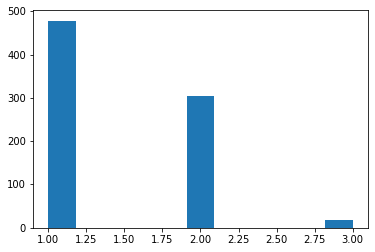

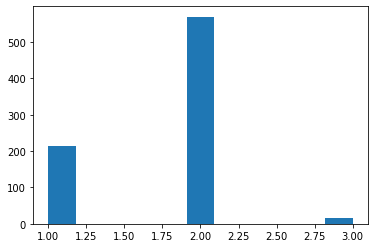

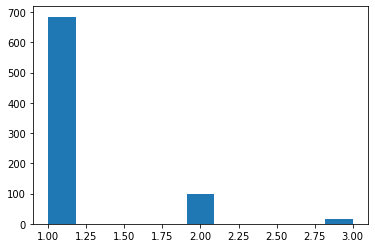

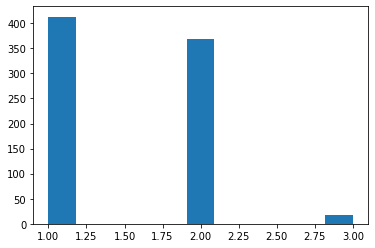

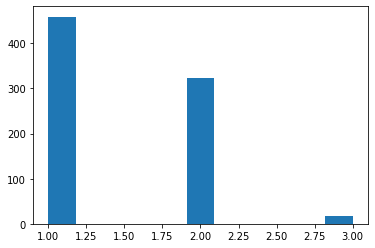

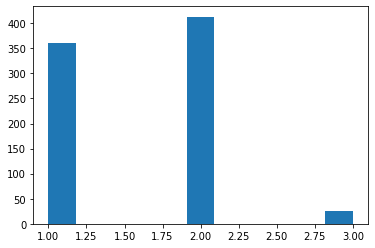

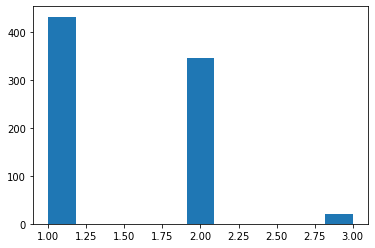

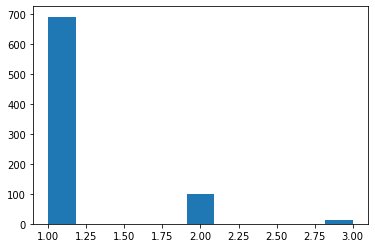

In [144]:
import matplotlib.pyplot as plt

y_dash = train_xy_dict['12009'][1]
import seaborn as sns
for i in range(8):
  data = []
  for delay in y_dash[i].to_numpy():
    if delay != -1:
      data.append(delay)
  plt.figure()
  plt.hist(data, bins='auto')

In [128]:
train_list = train_list[:4]

In [ ]:
nn_dict = run_NN_all_trains(train_list, train_xy_dict)
print(nn_dict)

In [ ]:
nn_dict2 = run_NN_with_SMOTE_all_trains(train_list, train_xy_dict)
print(nn_dict2)

In [131]:
xgb_dict = run_XGB_all_trains(train_list, train_xy_dict)
print(xgb_dict)

{'12009': 0.6585937500000001, '11001': 0.6058558558558559, '11015': 0.6195887445887446, '12512': 0.7269303201506592}


In [ ]:
xgb_dict2 = run_XGB_with_SMOTE_all_trains(train_list, train_xy_dict)
print(xgb_dict2)

In [ ]:
markov_dict = run_Markov_all_trains(['12512'], train_xy_dict)
print(markov_dict)

# CLustering Weather

In [ ]:
weather_table

,STN,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,F,R,S,H,T,T2
0,420270,99999,20190101,35.7,27.5,9999.9,846.2,1.1,0.4,1.0,999.9,40.6,24.4,0.00,999.9,0,0,0,0,0,0
1,420270,99999,20190102,36.5,31.8,9999.9,846.1,0.7,0.7,1.0,999.9,41.0,32.0,0.00,999.9,0,1,0,0,0,0
2,420270,99999,20190103,36.9,30.0,9999.9,848.6,1.5,0.7,1.9,999.9,44.6,32.0,0.00,999.9,0,0,0,0,0,0
3,420270,99999,20190104,32.7,29.3,9999.9,847.9,0.5,0.3,1.0,999.9,38.1,26.2,0.28,999.9,0,0,1,0,0,0
4,420270,99999,20190105,35.1,30.2,9999.9,844.1,0.9,0.4,1.0,999.9,40.3,29.7,0.98,999.9,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187378,433770,99999,20171227,81.6,69.0,1010.6,1006.5,3.0,10.2,15.9,999.9,90.0,75.4,0.00,999.9,0,0,0,0,0,0
187379,433770,99999,20171228,79.8,63.8,1010.3,1006.2,2.5,11.4,17.1,999.9,88.9,73.8,0.00,999.9,0,0,0,0,0,0
187380,433770,99999,20171229,81.1,61.7,1011.1,1007.0,2.5,11.8,13.0,999.9,88.2,75.6,0.00,999.9,0,0,0,0,0,0
187381,433770,99999,20171230,80.6,67.9,1010.6,1006.5,2.5,10.0,15.0,999.9,88.9,74.5,0.00,999.9,0,0,0,0,0,0


In [ ]:
filtered_weather_data = weather_table.copy()
def f(x):
  if str(x)[0:4] == '2019':
    print(1)
    return True
  return False
filtered_weather_data['year2019'] = filtered_weather_data['YEARMODA'].apply(f)
filtered_weather_data = filtered_weather_data[filtered_weather_data['year2019'] == True]
filtered_weather_data

Streaming output truncated to the last 5000 lines.
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

,STN,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,F,R,S,H,T,T2,year2019
0,420270,99999,20190101,35.7,27.5,9999.9,846.2,1.1,0.4,1.0,999.9,40.6,24.4,0.00,999.9,0,0,0,0,0,0,True
1,420270,99999,20190102,36.5,31.8,9999.9,846.1,0.7,0.7,1.0,999.9,41.0,32.0,0.00,999.9,0,1,0,0,0,0,True
2,420270,99999,20190103,36.9,30.0,9999.9,848.6,1.5,0.7,1.9,999.9,44.6,32.0,0.00,999.9,0,0,0,0,0,0,True
3,420270,99999,20190104,32.7,29.3,9999.9,847.9,0.5,0.3,1.0,999.9,38.1,26.2,0.28,999.9,0,0,1,0,0,0,True
4,420270,99999,20190105,35.1,30.2,9999.9,844.1,0.9,0.4,1.0,999.9,40.3,29.7,0.98,999.9,0,0,1,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64808,433770,99999,20191227,81.0,73.2,1010.1,1006.0,4.3,7.1,9.9,999.9,89.1,75.2,0.00,999.9,0,0,0,0,0,0,True
64809,433770,99999,20191228,80.5,69.8,1010.7,1006.6,4.3,5.5,8.0,999.9,88.2,74.8,0.00,999.9,0,0,0,0,0,0,True
64810,433770,99999,20191229,81.0,72.5,1010.6,1006.5,4.3,6.8,9.9,999.9,87.4,75.9,0.00,999.9,0,0,0,0,0,0,True
64811,433770,99999,20191230,82.1,72.8,1011.3,1007.2,4.1,4.8,9.9,999.9,88.9,74.8,0.00,999.9,0,0,0,0,0,0,True


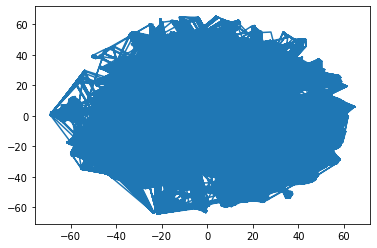

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X = filtered_weather_data.drop(columns=['STN','WBAN','YEARMODA', 'year2019'])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape


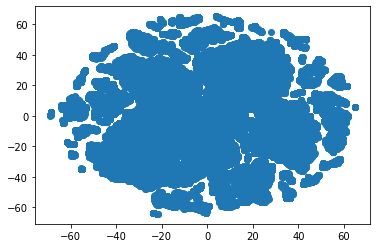

In [ ]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])